In [2]:
#firstly, I import all the libraries what I need 
import numpy as np
import cv2
import matplotlib.pyplot as plt

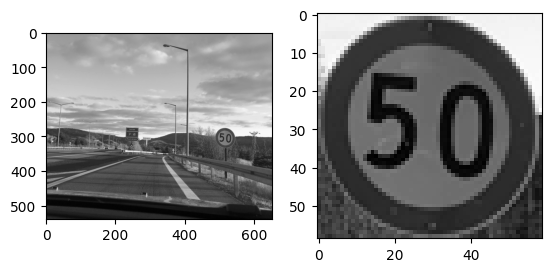

In [3]:
#read input and template images and show them.
input_image = cv2.imread("input.png", 0)
template_image = cv2.imread("template.png", 0)
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')

plt.subplot(1, 2, 2)
plt.imshow(template_image, cmap='gray')
plt.show()


In [4]:
# I implement all the function which the task wanted me
# correlationMeasure calculates the correlation between these two images (P and T), and then summing up the result.
def correlationMeasure(P, T):
    result= np.sum(P * T)
    return result
# zeroMeanCorrelationMeasure calculates the Zero Mean Correlation between these two images (P and T) sums up the result.
def zeroMeanCorrelationMeasure(P, T):
    T_mean = np.mean(T)
    result= np.sum((P - np.mean(P)) * (T - T_mean))
    return result
# sumOfSquaredDifferenceMeasure calculates the SSD between these two images (P and T) sums up the result.
def sumOfSquaredDifferenceMeasure(P, T):
    result = np.sum((P - T)**2)
    return result
# normalizedCrossCorrelationMeasure calculates the NCC between these two images (P and T) sums up the result and when denominator equals 0 it gives an
# error(ZeroDivisionError) and that's why I use try except block for escape this error.

def normalizedCrossCorrelationMeasure(P, T):
    P_mean = np.mean(P)
    T_mean = np.mean(T)
    numerator = np.sum((P - P_mean) * (T - T_mean))
    denominator = np.sqrt(np.sum((P - P_mean) ** 2) * np.sum((T - T_mean) ** 2))
    try:
        result = numerator / denominator
    except ZeroDivisionError:
        print("Error: division by zero")
        result = None
    return result

In [5]:
#template_matching function begins by calculating the template image's half-width and half-height and 
#initializing the outcome image as a zero-filled array with the same form as the input image. 
def template_matching(input_image, template_image, measure_function):
    h, w = template_image.shape
    M, N = input_image.shape
    a = h // 2
    b = w // 2
    result_image = np.zeros((M, N))
    input_image_norm = cv2.normalize(input_image.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
    template_image_norm = cv2.normalize(template_image.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
    for x in range(a, M - a):
        for y in range(b, N - b):
            patch = input_image_norm[x - a:x + a + 1, y - b:y + b + 1]
            result_image[x, y] = measure_function(patch, template_image_norm)
    result_image = cv2.normalize(result_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return result_image

In [6]:
# first three lines are calling the template_matching function,and the last line of uses OpenCV's built-in matchTemplate
# function obtain the normalized cross-correlation result.
correlation_result = template_matching(input_image, template_image, correlationMeasure)
zero_mean_result = template_matching(input_image, template_image, zeroMeanCorrelationMeasure)
squared_difference_result = template_matching(input_image, template_image, sumOfSquaredDifferenceMeasure)
normalized_cross_correlation_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCORR_NORMED)

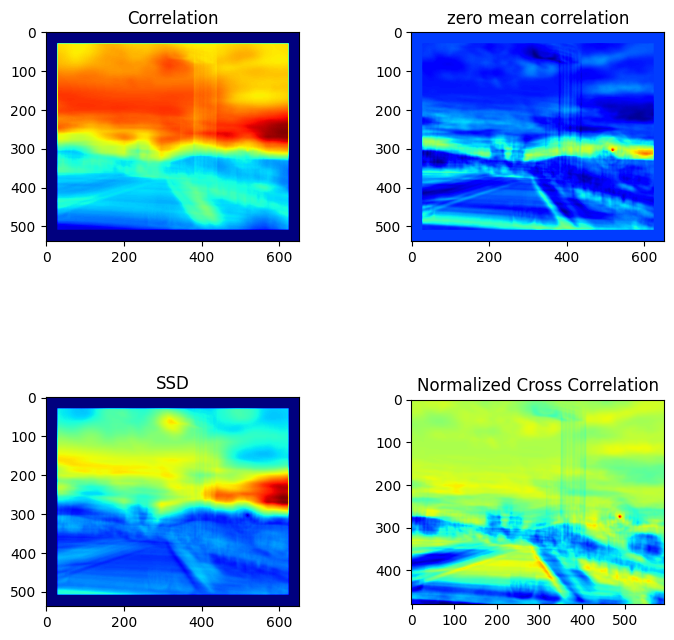

In [6]:
# and using matplotlib ,create a subplot and show the all function results
fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout(pad=5.0)
axs[0, 0].imshow(correlation_result, cmap='jet')
axs[0, 0].set_title('Correlation')
axs[0, 1].imshow(zero_mean_result, cmap='jet')
axs[0, 1].set_title('zero mean correlation')
axs[1, 0].imshow(squared_difference_result, cmap='jet')
axs[1, 0].set_title('SSD')
axs[1, 1].imshow(normalized_cross_correlation_result, cmap='jet')
axs[1, 1].set_title('Normalized Cross Correlation')
plt.show()

In [8]:
#firstly,it compute correlation result for finding a maximum correlation result and then compute zero mean correletion for finding a
# maximum zero mean correlation results.and vice versa and both of the function takes input and template image as a parameter.
# and it creates a copy for input image and draw a rectangle by using sum of squared difference functions results.
correlation_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCORR)
_, _, _, max_loc_correlation = cv2.minMaxLoc(correlation_result)
zero_mean_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCOEFF_NORMED)
_, _, _, max_loc_zero_mean = cv2.minMaxLoc(zero_mean_result)
normalized_cross_correlation_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCOEFF)
_, _, _, max_loc_normalized_cross_correlation = cv2.minMaxLoc(normalized_cross_correlation_result)
squared_difference_result = cv2.matchTemplate(input_image, template_image, cv2.TM_SQDIFF)
_, _, min_loc_squared_difference, _ = cv2.minMaxLoc(squared_difference_result)
input_image_with_rectangles = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
template_h, template_w = template_image.shape[:2]
cv2.rectangle(input_image_with_rectangles, min_loc_squared_difference, (min_loc_squared_difference[0] + template_w, min_loc_squared_difference[1] + template_h), (0, 255, 255), 2)
input_image_rgb = cv2.cvtColor(input_image_with_rectangles, cv2.COLOR_BGR2RGB)
template_image_rgb = cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB)

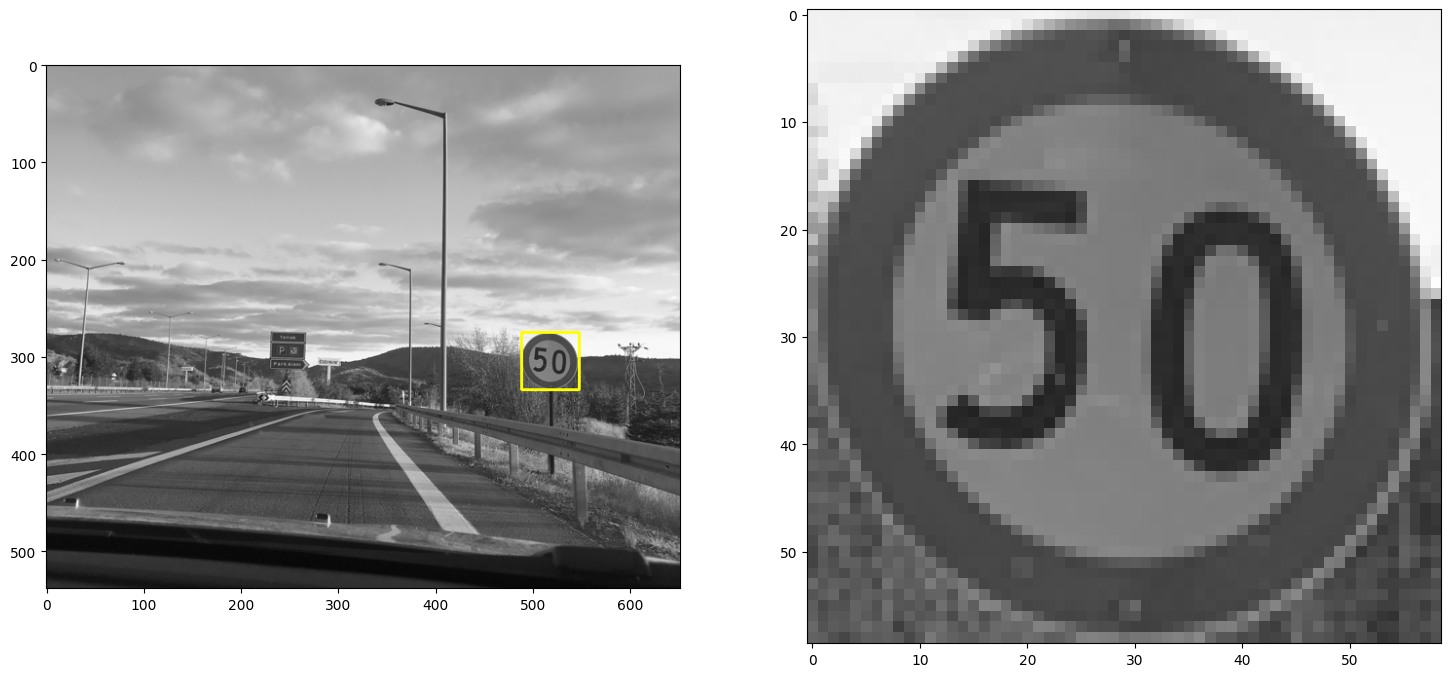

In [10]:
# Display the wanted output and template images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
ax1.imshow(input_image_rgb)
ax2.imshow(template_image_rgb)
plt.show()

In [11]:
# part1b
# all of the functions are same as task1 only the input image are change.
import numpy as np
import cv2
import matplotlib.pyplot as plt

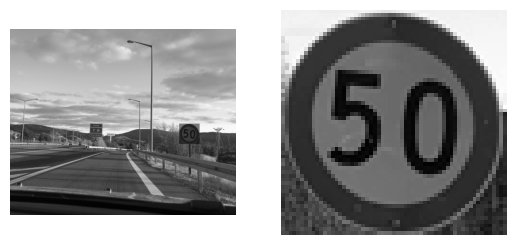

In [12]:
#read input and template images and show them.
input_image = cv2.imread("input2.png", cv2.IMREAD_GRAYSCALE)
template_image = cv2.imread("template.png", cv2.IMREAD_GRAYSCALE)
plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(template_image, cmap='gray')
plt.axis('off')
plt.show()

In [13]:
# correlationMeasure calculates the correlation between these two images (P and T), and then summing up the result.
def correlationMeasure(P, T):
    value= np.sum(P * T)
    return value
# zeroMeanCorrelationMeasure calculates the Zero Mean Correlation between these two images (P and T) sums up the result.
def zeroMeanCorrelationMeasure(P, T):
    T_mean = np.mean(T)
    value= np.sum((P - np.mean(P)) * (T - T_mean))
    return value
# sumOfSquaredDifferenceMeasure calculates the SSD between these two images (P and T) sums up the result.
def sumOfSquaredDifferenceMeasure(P, T):
    val = np.sum((P - T) ** 2)
    return val
# normalizedCrossCorrelationMeasure calculates the NCC between these two images (P and T) sums up the result and when denominator equals 0 it gives an
# error(ZeroDivisionError) and that's why I use try except block for escape this error.
def normalizedCrossCorrelationMeasure(P, T):
    P_mean = np.mean(P)
    T_mean = np.mean(T)
    numerator = np.sum((P - P_mean) * (T - T_mean))
    denominator = np.sqrt(np.sum((P - P_mean) ** 2) * np.sum((T - T_mean) ** 2))
    try:
        result = numerator / denominator
    except ZeroDivisionError:
        print("Error: division by zero")
        result = None
    return result
#template_matching function begins by calculating the template image's half-width and half-height and 
#initializing the outcome image as a zero-filled array with the same form as the input image. 
def template_matching(input_image, template_image, measure_function):
    h, w = template_image.shape
    M, N = input_image.shape
    a = h // 2
    b = w // 2
    result_image = np.zeros((M, N))
    input_image_norm = cv2.normalize(input_image.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
    template_image_norm = cv2.normalize(template_image.astype('float'), None, 0, 1, cv2.NORM_MINMAX)
    for x in range(a, M - a):
        for y in range(b, N - b):
            patch = input_image_norm[x - a:x + a + 1, y - b:y + b + 1]
            result_image[x, y] = measure_function(patch, template_image_norm)
    result_image = cv2.normalize(result_image, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
    return result_image




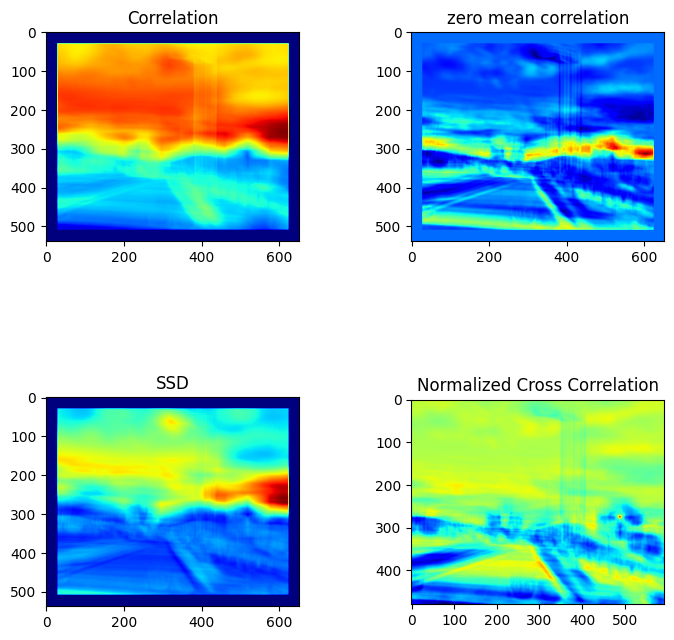

In [15]:
# first three lines are calling the template_matching function,and the last line of uses OpenCV's built-in matchTemplate
# function obtain the normalized cross-correlation result.
correlation_result = template_matching(input_image, template_image, correlationMeasure)
zero_mean_result = template_matching(input_image, template_image, zeroMeanCorrelationMeasure)
squared_difference_result = template_matching(input_image, template_image, sumOfSquaredDifferenceMeasure)
normalized_cross_correlation_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCORR_NORMED)
# and using matplotlib ,create a subplot and show the all function results

fig, axs = plt.subplots(2, 2, figsize=(8, 8))
fig.tight_layout(pad=5.0)
axs[0, 0].imshow(correlation_result, cmap='jet')
axs[0, 0].set_title('Correlation')
axs[0, 1].imshow(zero_mean_result, cmap='jet')
axs[0, 1].set_title('zero mean correlation')
axs[1, 0].imshow(squared_difference_result, cmap='jet')
axs[1, 0].set_title('SSD')
axs[1, 1].imshow(normalized_cross_correlation_result, cmap='jet')
axs[1, 1].set_title('Normalized Cross Correlation')
plt.show()


In [22]:
#at first,it compute correlation result for finding a maximum correlation result and then compute zero mean correletion for finding a
# maximum zero mean correlation results.and vice versa and both of the function takes input and template image as a parameter.
# and it creates a copy for input image and draw a rectangle by using sum of squared difference functions results.
correlation_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCORR)
_, _, _, max_loc_correlation = cv2.minMaxLoc(correlation_result)
zero_mean_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCOEFF_NORMED)
_, _, _, max_loc_zero_mean = cv2.minMaxLoc(zero_mean_result)
normalized_cross_correlation_result = cv2.matchTemplate(input_image, template_image, cv2.TM_CCOEFF)
_, _, _, max_loc_normalized_cross_correlation = cv2.minMaxLoc(normalized_cross_correlation_result)
squared_difference_result = cv2.matchTemplate(input_image, template_image, cv2.TM_SQDIFF)
_, _, min_loc_squared_difference, _ = cv2.minMaxLoc(squared_difference_result)
input_image_with_rectangles = cv2.cvtColor(input_image, cv2.COLOR_GRAY2BGR)
template_h, template_w = template_image.shape[:2]
cv2.rectangle(input_image_with_rectangles, max_loc_zero_mean, (max_loc_zero_mean[0] + template_w, max_loc_zero_mean[1] + template_h), (0, 255, 255), 2)
input_image_rgb = cv2.cvtColor(input_image_with_rectangles, cv2.COLOR_BGR2RGB)
template_image_rgb = cv2.cvtColor(template_image, cv2.COLOR_BGR2RGB)

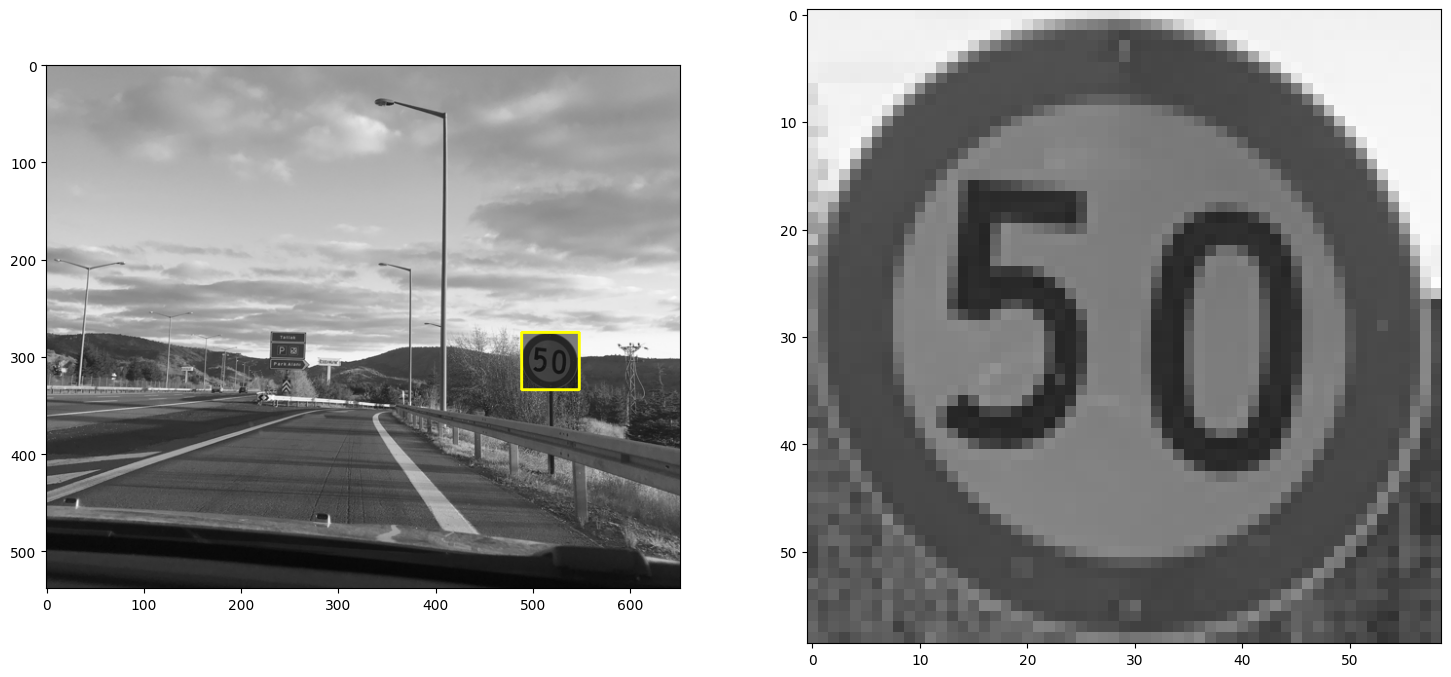

In [23]:
# Display the wanted output and template images
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))
ax1.imshow(input_image_rgb)
ax2.imshow(template_image_rgb)
plt.show()